In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import pickle

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\A

[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package qc is already up-to-date!
[nltk_data]    | Downloading package reuters to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package reuters is already up-to-date!
[nltk_data]    | Downloading package rte to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package rte is already up-to-date!
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roamin

[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roam

True

In [3]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
np.random.seed(500)

In [5]:
Corpus = pd.read_csv(r"allnews8.csv",encoding='latin-1',error_bad_lines=False)

In [9]:
# Step - a : Remove blank rows if any.
Corpus['text'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['text'] = [entry.lower() for entry in Corpus['text']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

In [10]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['label'],test_size=0.3)

In [11]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [12]:
listofclasses=list(Encoder.classes_)
listofclasses
algorithmname=[]
algoaccuracy=[]

In [13]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [16]:
Train_X_Tfidf

<107x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 17347 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
data = fetch_20newsgroups_vectorized()
X, y = Train_X_Tfidf, Train_Y
scores, pvalues = chi2(X, y)


pvalues1=np.nan_to_num(pvalues)

x2 = statistics.mean(pvalues1) 
  
# Printing the mean 
print("p value is", x2) 

p value is 0.7797081261051438


In [10]:
print(Tfidf_vect.vocabulary_)

{'case': 607, 'surge': 3935, 'amanjeet': 161, 'singh': 3684, 'salyal': 3479, 'talk': 3977, 'dr': 1200, 'jagat': 2059, 'ram': 3215, 'director': 1130, 'post': 3009, 'graduate': 1673, 'institute': 1991, 'medical': 2458, 'education': 1249, 'research': 3351, 'pgimer': 2931, 'chandigarh': 651, 'state': 3831, 'preparedness': 3049, 'shortcoming': 3649, 'therein': 4038, 'region': 3286, 'claim': 723, 'premier': 3043, 'prepared': 3048, 'tackle': 3973, 'situation': 3696, 'caution': 617, 'neighbour': 2667, 'bit': 474, 'enough': 1301, 'test': 4021, 'facility': 1416, 'sample': 3481, 'people': 2902, 'day': 1000, 'average': 326, 'conduct': 825, 'daily': 984, 'right': 3398, 'reagent': 3251, 'mixture': 2533, 'use': 4231, 'chemical': 679, 'analysis': 182, 'procure': 3097, 'regular': 3292, 'basis': 396, 'national': 2639, 'virology': 4310, 'pune': 3156, 'indian': 1937, 'council': 917, 'number': 2726, 'spike': 3777, 'need': 2657, 'testing': 4023, 'load': 2303, 'share': 3622, 'capacity': 586, 'limited': 2281,

In [11]:
print(Train_X_Tfidf)

  (0, 4407)	0.06492982674767792
  (0, 4368)	0.07277294583892417
  (0, 4367)	0.04061391822252433
  (0, 4343)	0.09731126764396492
  (0, 4284)	0.059662575432039566
  (0, 4279)	0.06492982674767792
  (0, 4254)	0.0907817970358633
  (0, 4190)	0.07003554474759784
  (0, 4189)	0.039651208223512896
  (0, 4176)	0.1118508022984167
  (0, 4175)	0.13617269555379496
  (0, 4090)	0.03501777237379892
  (0, 4055)	0.026342241308416413
  (0, 4019)	0.1060532471414761
  (0, 4001)	0.06492982674767792
  (0, 3982)	0.04865563382198246
  (0, 3975)	0.01893049835865674
  (0, 3927)	0.04061391822252433
  (0, 3926)	0.04402219797226848
  (0, 3853)	0.050658149833570004
  (0, 3833)	0.04061391822252433
  (0, 3832)	0.04402219797226848
  (0, 3831)	0.1070621409477249
  (0, 3807)	0.0664043505455293
  (0, 3789)	0.09194034787513
  :	:
  (74, 705)	0.07224334664303825
  (74, 649)	0.07224334664303825
  (74, 625)	0.05220602720401948
  (74, 616)	0.07792415889536736
  (74, 607)	0.06924863845432729
  (74, 605)	0.1444866932860765
  (74, 

In [15]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
filename = 'naive_bayes_model.sav'
pickle.dump(Naive, open(filename, 'wb'))

acc=accuracy_score(predictions_NB, Test_Y)*100
algorithmname.append('Naive Bayes')
algoaccuracy.append(acc)

Naive Bayes Accuracy Score ->  42.42424242424242


In [16]:
from sklearn.metrics import precision_recall_fscore_support
op=precision_recall_fscore_support(Test_Y, predictions_NB, average='macro')

print("precision is "+str(op[0]))
print("recall is "+str(op[1]))
print("f1score is "+str(op[2]))


precision is 0.7738095238095237
recall is 0.47222222222222227
f1score is 0.39073359073359076


In [17]:
listofclasses

['delhi', 'mumbai', 'pune']

In [18]:
Test_Y.tolist()

[2,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 1]

['pune' 'mumbai' 'mumbai' 'mumbai' 'delhi' 'pune' 'mumbai' 'delhi' 'pune'
 'delhi' 'mumbai' 'delhi' 'pune' 'pune' 'mumbai' 'mumbai' 'delhi' 'pune'
 'delhi' 'pune' 'delhi' 'delhi' 'mumbai' 'mumbai' 'pune' 'mumbai' 'delhi'
 'pune' 'pune' 'pune' 'mumbai' 'pune' 'mumbai']
['delhi' 'delhi' 'delhi' 'delhi' 'delhi' 'delhi' 'delhi' 'delhi' 'pune'
 'delhi' 'delhi' 'delhi' 'pune' 'delhi' 'mumbai' 'delhi' 'delhi' 'delhi'
 'delhi' 'delhi' 'delhi' 'delhi' 'delhi' 'mumbai' 'delhi' 'mumbai' 'delhi'
 'delhi' 'delhi' 'delhi' 'delhi' 'delhi' 'delhi']
[[ 9  0  0]
 [ 9  3  0]
 [10  0  2]]


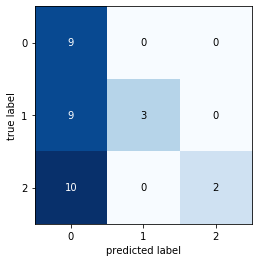

In [19]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

#listofclasses


expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(predictions_NB.tolist()) 
print(expected)
print(predicted)
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

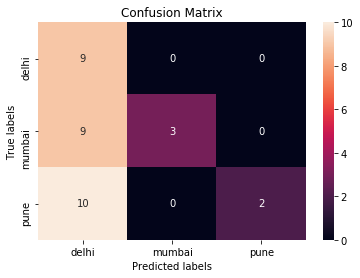

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt     
labels =listofclasses# ['delhi.txt', 'mumbai.txt','pune.txt']
ax= plt.subplot()
cm = confusion_matrix(expected, predicted, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


In [23]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
filename = 'svm_linear_model.sav'
pickle.dump(SVM, open(filename, 'wb'))
acc=accuracy_score(predictions_SVM, Test_Y)*100
algorithmname.append('SVM')
algoaccuracy.append(acc)

SVM Accuracy Score ->  54.54545454545454


In [24]:
from sklearn.metrics import precision_recall_fscore_support
op=precision_recall_fscore_support(Test_Y, predictions_SVM, average='macro')

print("precision is "+str(op[0]))
print("recall is "+str(op[1]))
print("f1score is "+str(op[2]))


precision is 0.554040404040404
recall is 0.5648148148148148
f1score is 0.5584159674548691


[[7 2 0]
 [2 5 5]
 [1 5 6]]


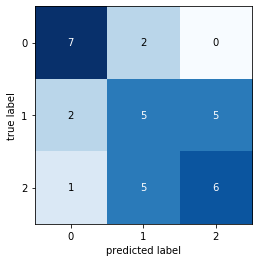

In [25]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = Test_Y.tolist()
predicted =predictions_SVM.tolist()
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

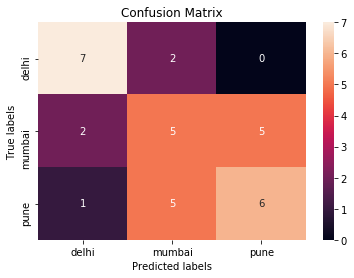

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt     
labels =listofclasses# ['delhi.txt', 'mumbai.txt','pune.txt']
ax= plt.subplot()
expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(predictions_SVM.tolist()) 
cm = confusion_matrix(expected, predicted, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


In [27]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
filename = 'svm_rbf_model.sav'
pickle.dump(SVM, open(filename, 'wb'))

SVM Accuracy Score ->  27.27272727272727


In [28]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='sigmoid', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
filename = 'svm_sigmoid_model.sav'
pickle.dump(SVM, open(filename, 'wb'))

SVM Accuracy Score ->  27.27272727272727


[[ 9  0  0]
 [12  0  0]
 [12  0  0]]


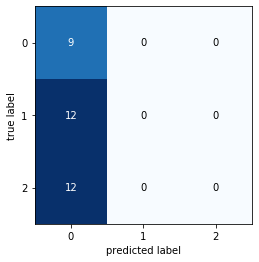

In [29]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = Test_Y.tolist()
predicted =predictions_SVM.tolist()
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

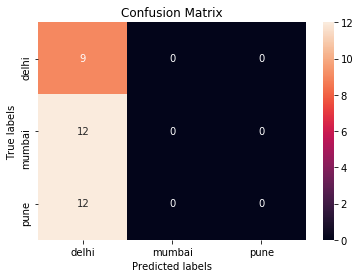

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt     
labels =listofclasses# ['delhi.txt', 'mumbai.txt','pune.txt']
ax= plt.subplot()
expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(predictions_SVM.tolist()) 
cm = confusion_matrix(expected, predicted, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=2500, random_state=0)
classifier.fit(Train_X_Tfidf, Train_Y) 

predictions_RF = classifier.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("RF Accuracy Score -> ",accuracy_score(predictions_RF, Test_Y)*100)
filename = 'random_forest_model.sav'
pickle.dump(classifier, open(filename, 'wb'))
acc=accuracy_score(predictions_RF, Test_Y)*100
algorithmname.append('Random Forest')
algoaccuracy.append(acc)

RF Accuracy Score ->  72.72727272727273


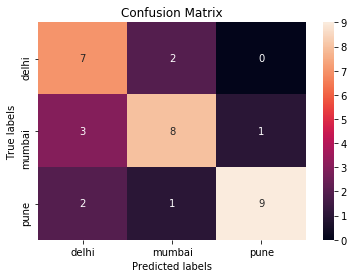

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt     
labels =listofclasses# ['delhi.txt', 'mumbai.txt','pune.txt']
ax= plt.subplot()
expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(predictions_RF.tolist()) 
cm = confusion_matrix(expected, predicted, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


In [33]:
from sklearn.metrics import precision_recall_fscore_support
op=precision_recall_fscore_support(Test_Y, predictions_RF, average='macro')

print("precision is "+str(op[0]))
print("recall is "+str(op[1]))
print("f1score is "+str(op[2]))


precision is 0.7368686868686868
recall is 0.7314814814814815
f1score is 0.7268335529205094


[[7 2 0]
 [3 8 1]
 [2 1 9]]


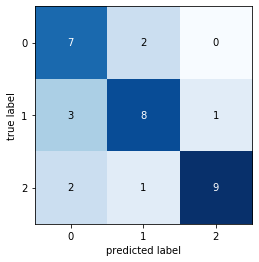

In [34]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = Test_Y.tolist()
predicted =predictions_RF.tolist()
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(Train_X_Tfidf, Train_Y) 

predictions_RF = classifier.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("RF Accuracy Score -> ",accuracy_score(predictions_RF, Test_Y)*100)

RF Accuracy Score ->  72.72727272727273


[[7 2 0]
 [2 8 2]
 [2 1 9]]


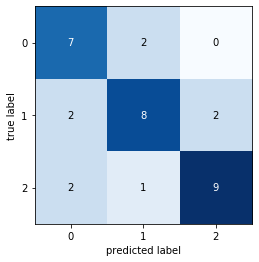

In [36]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = Test_Y.tolist()
predicted =predictions_RF.tolist()
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

In [37]:
from sklearn.metrics import precision_recall_fscore_support
op=precision_recall_fscore_support(Test_Y, predictions_RF, average='macro')

print("precision is "+str(op[0]))
print("recall is "+str(op[1]))
print("f1score is "+str(op[2]))


precision is 0.7272727272727274
recall is 0.7314814814814815
f1score is 0.7260869565217392


In [38]:
Train_X_Tfidf.shape

(75, 4462)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
#Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['label'],test_size=0.3)

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(Train_X, Train_Y)



y_pred = logreg.predict(Test_X)

print('accuracy %s' % accuracy_score(y_pred, Test_Y)*100)
acc=accuracy_score(y_pred, Test_Y)*100
algorithmname.append('Logistic regression')
algoaccuracy.append(acc)
#print(classification_report(y_test, y_pred))

accuracy 0.6060606060606061


[[8 1 0]
 [3 5 4]
 [2 3 7]]


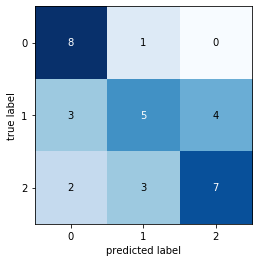

In [40]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = Test_Y.tolist()
predicted =y_pred.tolist()
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

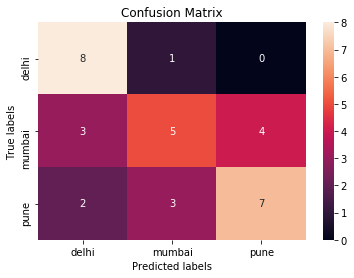

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt     
labels = listofclasses#['delhi.txt', 'mumbai.txt','pune.txt']
ax= plt.subplot()
expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(y_pred.tolist()) 
cm = confusion_matrix(expected, predicted, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


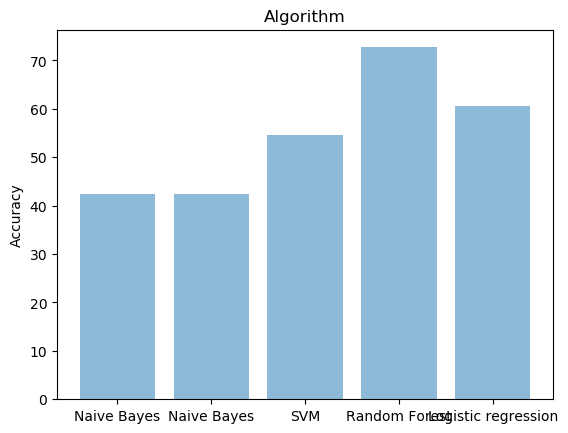

In [42]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects =algorithmname
y_pos = np.arange(len(objects))
performance = algoaccuracy

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm')

plt.show()